In [1]:
from models.text_pre_processor import preprocess_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ervinballa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ervinballa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ervinballa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('datasets/dataset2.csv')
df

,issue_label,processed_text
0,bug,tilesrcrect null entitiesldtk sample nullable ...
1,bug,update blog link sef site describe bug update ...
2,bug,parser properly distinguish parenthesised expr...
3,bug,row added snackbar visible grid small height d...
4,bug,crash tcpwriteonsocket crash flushing async pe...
...,...,...
57002,question,help volume mount hostpath unable mount volume...
57003,question,formprogress valid upload progress thought for...
57004,question,rpi used door contact sensor warning log thank...
57005,question,tail latency envoy proxy bad every request cre...


In [3]:
df['text'] = df['issue_title']+ " " + df['issue_body'] #combining the fields
df['text']

0        __tileSrcRect is null in Entities.ldtk Sample ...
1        Update the blog link in the SEF Site **Describ...
2        🐛 Parser cannot properly distinguish between p...
3        "Row added" snackbar is not visible if the gri...
4        [CRASH]  _tcp_write_on_socket crashes when flu...
                               ...                        
72284    [HELP] Volume Mount hostpath: Unable to mount ...
72285    is form.progress valid for upload progress? I ...
72286    RPi used for door contact sensors, warning in ...
72287    Tail latency of envoy proxy is bad if every re...
72288    Setting the date value programmatically  after...
Name: text, Length: 72289, dtype: object

In [3]:
# Separate features and labels

X = df['processed_text']  # Text column
y = df['issue_label']   # Label column

# Split data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)


In [5]:
vectorizer = TfidfVectorizer(preprocessor=preprocess_text, max_features=10000)
vectorizer.fit_transform(X_train)

#LOOKS LIKE IT WILL FINALLY WORK + TRAIN ANOTHER MODEL WITH THIS


<36484x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1246462 stored elements in Compressed Sparse Row format>

In [6]:
# Save the vectorizer
joblib.dump(vectorizer, 'vectorizers/vectorizer10k2.pkl')

['vectorizers/vectorizer10k2.pkl']

In [7]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [14]:
X_val_tfidf = vectorizer.fit_transform(X_val)

In [19]:
X_test_tfidf = vectorizer.fit_transform(X_test)

In [9]:
print(y_train)

44532    enhancement
2041             bug
31224    enhancement
24057            bug
35094    enhancement
            ...     
26334            bug
24263            bug
12135            bug
49668    enhancement
31198    enhancement
Name: issue_label, Length: 36484, dtype: object


In [10]:
# Encode the labels in y_train using numbers 0, 1, 2
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Example: Print mapping of labels to numbers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Example: Print the encoded labels
print(y_train_encoded)

Label Mapping: {'bug': 0, 'enhancement': 1, 'question': 2}
[1 0 1 ... 0 1 1]


In [11]:
# Encode the labels in y_val using numbers 0, 1, 2
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)

# Example: Print mapping of labels to numbers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Example: Print the encoded labels
print(y_val_encoded)

Label Mapping: {'bug': 0, 'enhancement': 1, 'question': 2}
[0 1 1 ... 0 1 0]


In [12]:
# Encode the labels in y_train using numbers 0, 1, 2
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Example: Print mapping of labels to numbers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Example: Print the encoded labels
print(y_test_encoded)

Label Mapping: {'bug': 0, 'enhancement': 1, 'question': 2}
[0 2 1 ... 1 0 1]


In [13]:
# Initialize the model with class weights to handle imbalance
model = RandomForestClassifier(n_estimators=150, min_samples_split=5, random_state=42, class_weight="balanced")

# Train the model
model.fit(X_train_tfidf, y_train_encoded)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=150, random_state=42)

In [15]:
# Evaluate on the validation set
y_val_pred = model.predict(X_val_tfidf)

# Print performance metrics
print(classification_report(y_val_encoded, y_val_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      4851
           1       0.52      0.30      0.38      3398
           2       0.09      0.21      0.13       872

    accuracy                           0.47      9121
   macro avg       0.40      0.38      0.37      9121
weighted avg       0.52      0.47      0.48      9121



In [23]:
joblib.dump(model, 'trained_models/model2.pkl')

['trained_models/model2.pkl']

In [16]:
# Initialize the model with class weights to handle imbalance
model3 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train the model
model3.fit(X_train_tfidf, y_train_encoded)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
# Evaluate on the validation set
y_val_pred3 = model.predict(X_val_tfidf)

# Print performance metrics
print(classification_report(y_val_encoded, y_val_pred3))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      4851
           1       0.52      0.30      0.38      3398
           2       0.09      0.21      0.13       872

    accuracy                           0.47      9121
   macro avg       0.40      0.38      0.37      9121
weighted avg       0.52      0.47      0.48      9121



In [20]:
# Evaluate on the test set
y_test_pred3 = model.predict(X_test_tfidf)

# Print performance metrics
print(classification_report(y_test_encoded, y_test_pred3))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      6065
           1       0.41      0.36      0.38      4247
           2       0.08      0.18      0.11      1090

    accuracy                           0.42     11402
   macro avg       0.36      0.35      0.35     11402
weighted avg       0.48      0.42      0.45     11402



In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

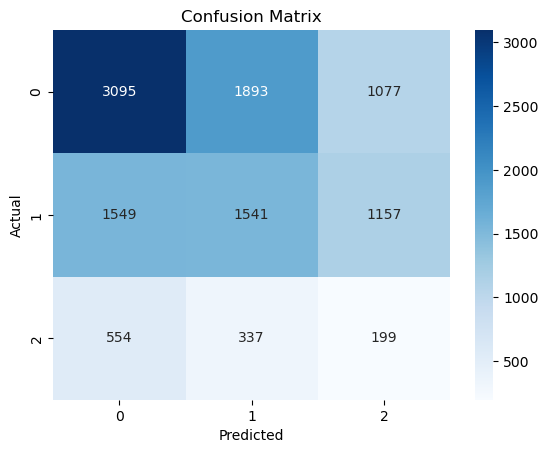

In [22]:
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred3)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()